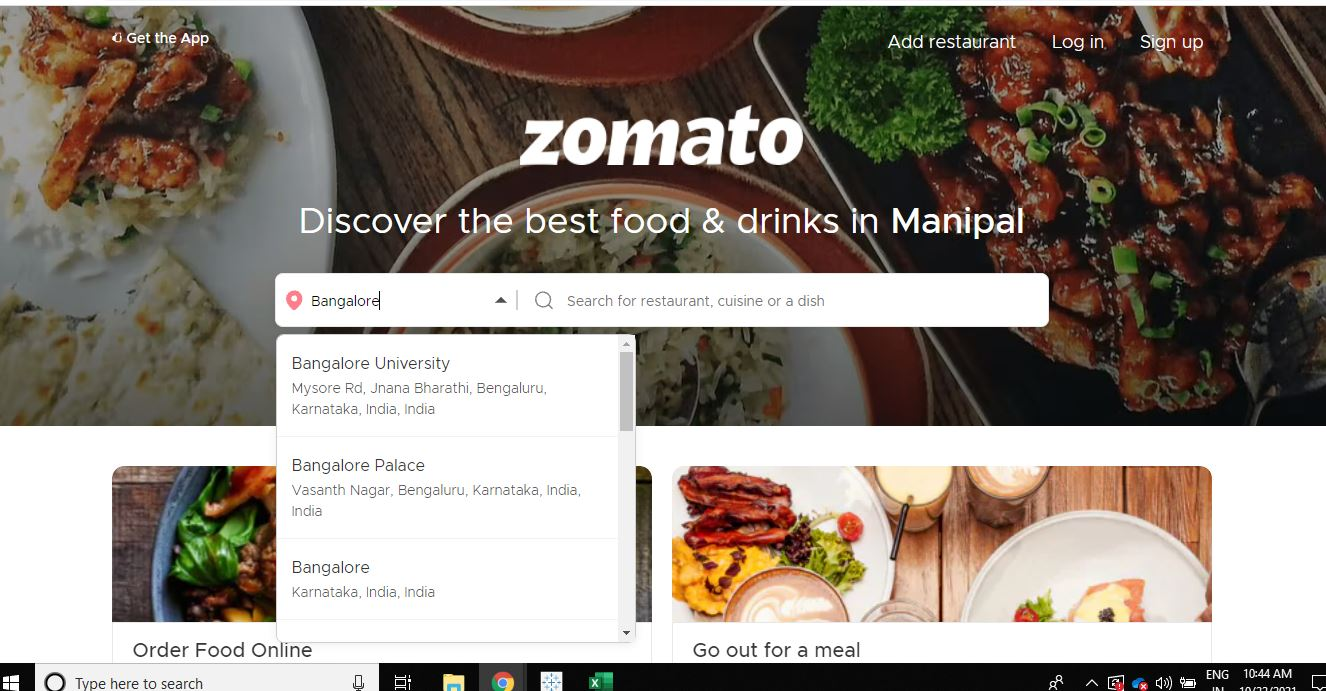

The Kaggle dataset was downloaded using the Zomato API. It contains dimensional information of restaurants listed on the platform. The columns available are listed below.

    Restaurant Id: Unique id of every restaurant across various cities of the world
    Restaurant Name: Name of the restaurant
    Country Code: Country in which restaurant is located
    City: City in which restaurant is located
    Address: Address of the restaurant
    Locality: Location in the city
    Locality Verbose: Detailed description of the locality
    Longitude: Longitude coordinate of the restaurant’s location
    Latitude: Latitude coordinate of the restaurant’s location
    Cuisines: Cuisines offered by the restaurant
    Average Cost for two: Cost for two people in different currencies (local currency)
    Currency: Currency of the country
    Has Table booking: yes/no
    Has Online delivery: yes/ no
    Is delivering: yes/ no
    Switch to order menu: yes/no
    Price range: range of price of food
    Aggregate Rating: Average rating out of 5
    Rating color: depending upon the average rating color
    Rating text: text on the basis of rating of rating
    Votes: Number of ratings given
    Switch to order menu is NO for all observations, hence it’s of no value.
	Price range ranges from one to four, with four being premium-priced restaurants.

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## 2. Reading file

In [2]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### 2.1 Combining Country Code with the original dataset

In [5]:
country_codes = pd.read_excel('Country-Code.xlsx')
country_codes.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
data = pd.merge(df,country_codes,how='left',on='Country Code')

In [7]:
data.drop(['Country Code','Address','Locality','Locality Verbose','Longitude', 'Latitude'],axis=1,inplace=True)

In [8]:
data.head()

,Restaurant ID,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## 3. Basic Exploration

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Is delivering now     9551 non-null   object 
 9   Switch to order menu  9551 non-null   object 
 10  Price range           9551 non-null   int64  
 11  Aggregate rating      9551 non-null   float64
 12  Rating color          9551 non-null   object 
 13  Rating text           9551 non-null   object 
 14  Votes                 9551 non-null   int64  
 15  Country              

### 3.1 Exploring contnious features
Note: Here `Restaurant ID` may not be considered a continous variable

In [10]:
data.describe()

,Restaurant ID,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,800000.000000,4.000000,4.900000,10934.000000


### 3.2 Exploring categorical features

In [11]:
data.describe(include='object')

,Restaurant Name,City,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
count,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,1825,12,2,2,2,1,6,6,15
top,Cafe Coffee Day,New Delhi,North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average,India
freq,83,5473,936,8652,8393,7100,9517,9551,3737,3737,8652


### 3.3 Exploring unique values for each categorical feature

In [12]:
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

Restaurant Name
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
--------------------------------------------------
City
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sio

In [13]:
data.shape

(9551, 16)

## 4. Missing Values

In [14]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

## `Observation:`
We can see only `Cuisines` have 9 missing values which can be dropped from the dataset

In [15]:
data['Cuisines'].dropna(axis=0,inplace=True)


## 4. Outlier Analysis

### 4.1 Plotting Distribution for continous features

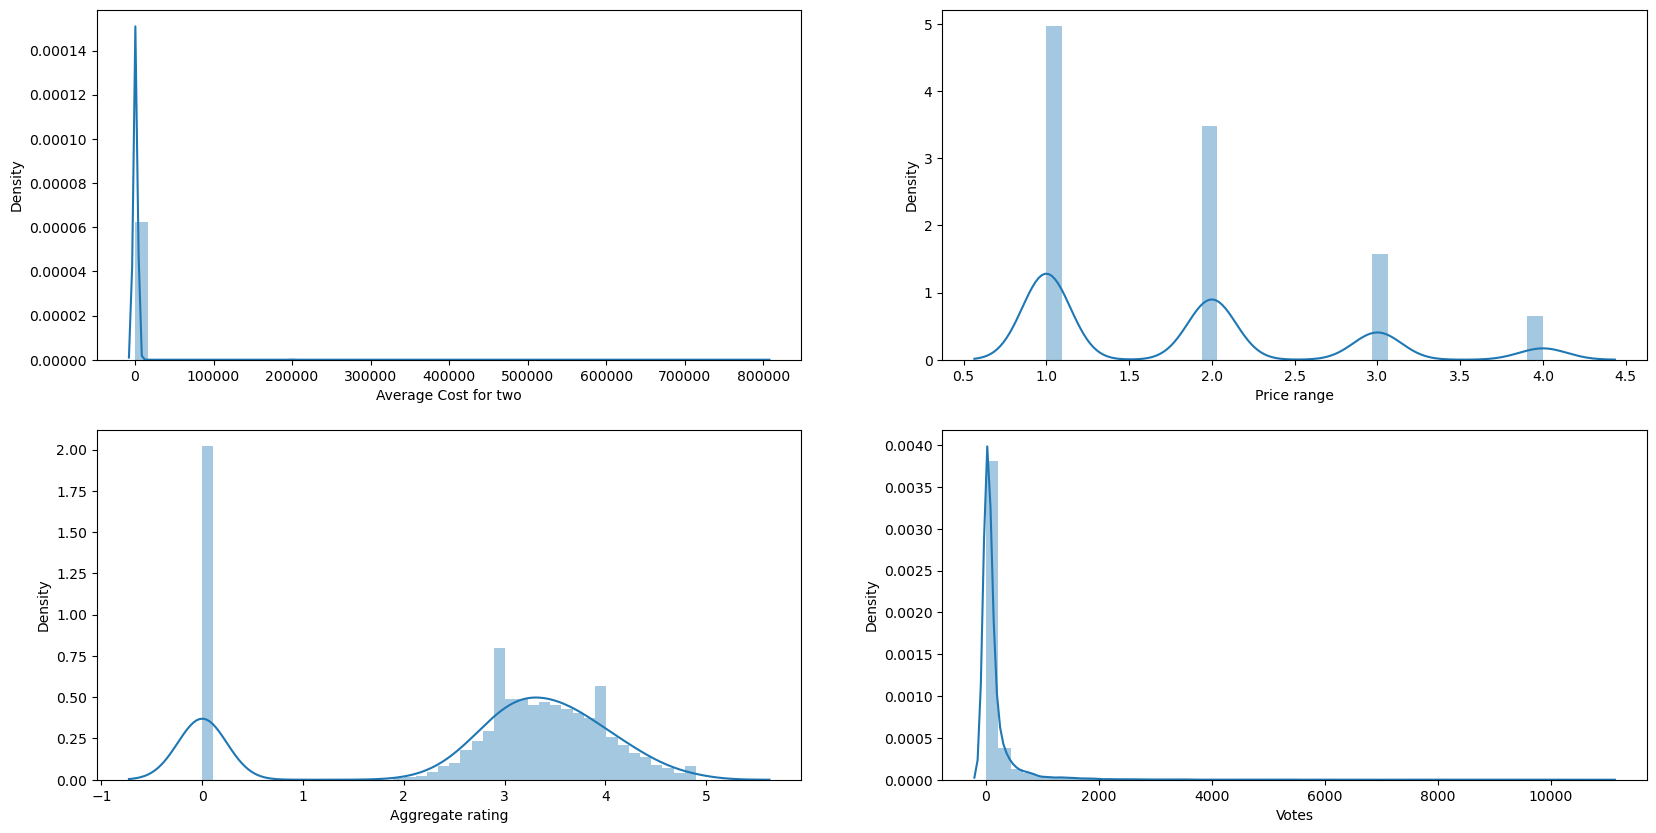

In [16]:
labels = list(data.describe().columns)[1:]
c=0
plt.figure(figsize=(20,10))
for i in labels:
    c=c+1
    plt.subplot(2,2,c)
    sns.distplot(df[i],kde=True,)
    
plt.show()

### 4.2 Z-Score Analysis to remove outliers

In [17]:
import scipy.stats as st
zr = np.abs(st.zscore(df['Restaurant ID']))

In [18]:
continous_df = df[list(data.describe().columns)[1:]]
z = np.abs(st.zscore(continous_df))
continous_df = continous_df[(z<3).all(axis=1)]
continous_df.shape

(9362, 4)

## `Observation:`
We can see that datapoints have been reduced from 9551 to 9362 removing outliers with z-score > 3

In [19]:
clean_data = data.iloc[continous_df.index]

In [20]:
clean_data.head()

,Restaurant ID,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### 4.3 Verifying using distribution plot

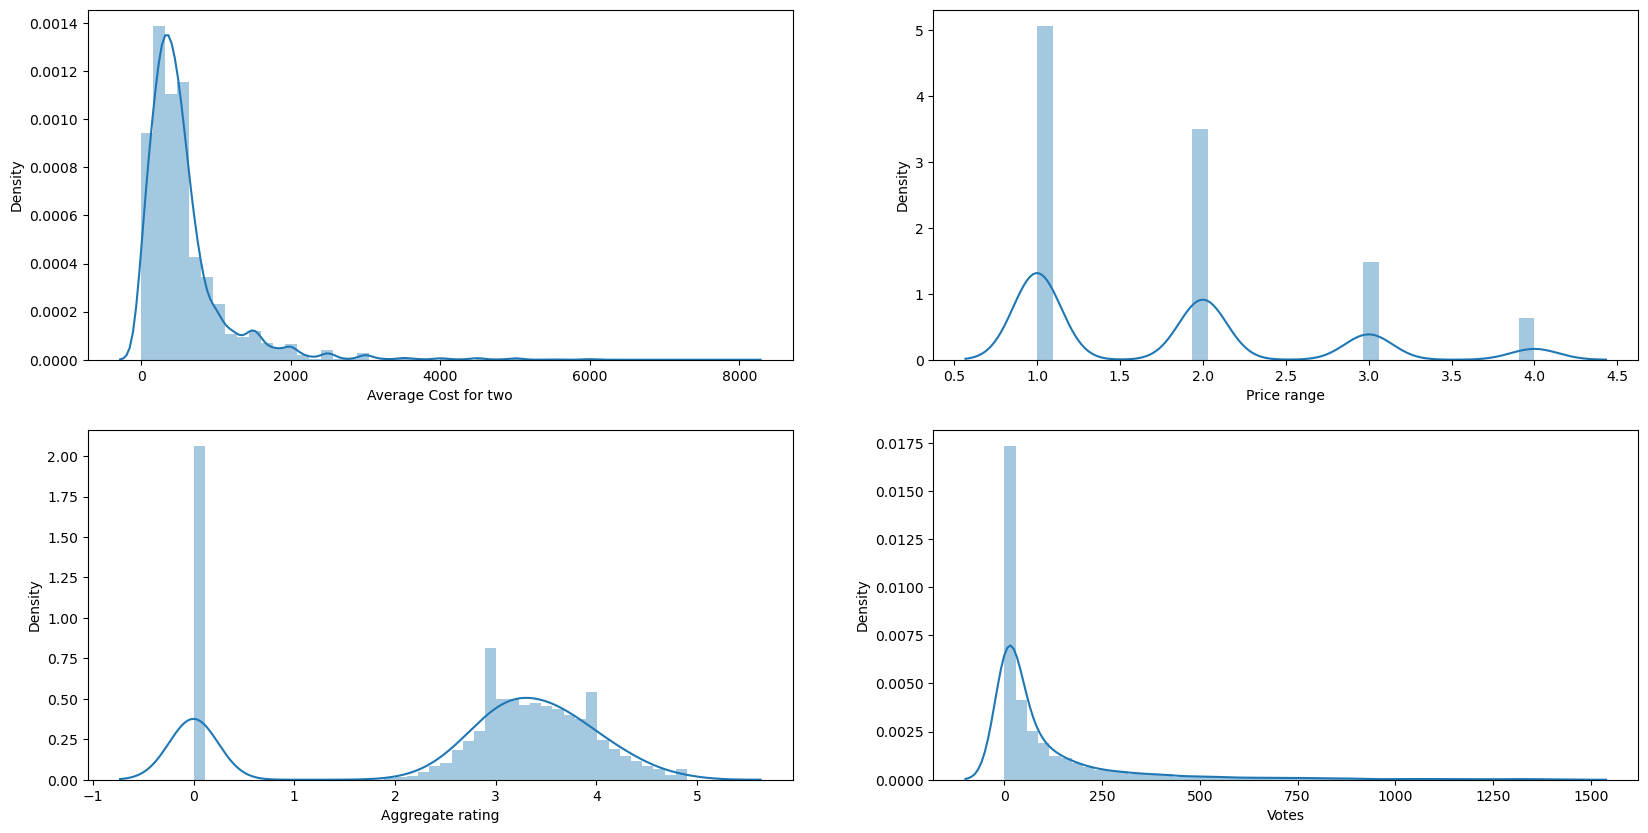

In [21]:
labels = list(data.describe().columns)[1:]
c=0
plt.figure(figsize=(20,10))
for i in labels:
    c=c+1
    plt.subplot(2,2,c)
    sns.distplot(clean_data[i],kde=True,)
    
plt.show()

## 5. Extracting Insights using Visualizations

### 5.1 Top 3 countries for which data represents

In [22]:
country_counts = clean_data['Country'].value_counts()


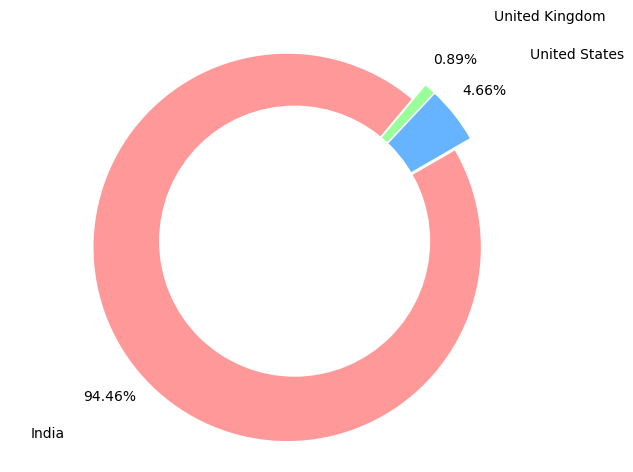

In [23]:
fig1, ax1 = plt.subplots()

colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
plt.pie(x=country_counts[:3],labels=country_counts[:3].index,autopct='%1.2f%%',
        radius=1,pctdistance=1.2,startangle=50,labeldistance=1.5,
        counterclock=True,explode=explode,colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## `Observation:`
Cleary the data is dominating for India as more than 90% of it comes from Indian Restaurants. The top 3 on list are India, USA and UK

### 5.2 Penetration across cities for each Country



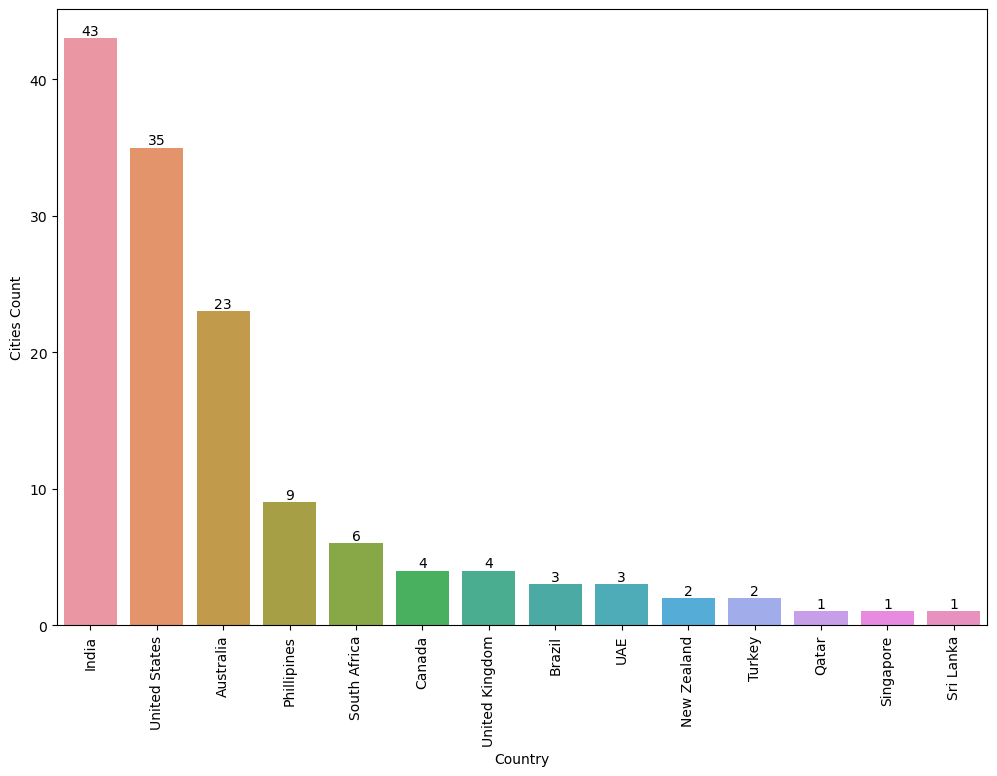

In [24]:
city_counts = list()
for i in clean_data.groupby(['Country','City']).count().index:
    city_counts.append(i[0])
city_counts = dict(Counter(city_counts))
city_counts = dict(sorted(city_counts.items(),key=lambda x:x[1],reverse=True))
country = list(city_counts.keys())
counts = list(city_counts.values())
fig = plt.figure(figsize=(12,8))
plt.xlabel('Country')
plt.ylabel('Cities Count')
plt.xticks(rotation=90)
ax = sns.barplot(x=country,y=counts)
ax.bar_label(ax.containers[0])
plt.show()

## `Observation:`

Zomato is present in 43 cities in India and 35 in the USA and 23 in Australia and the rest 12 cities are in single digits. So it validates the previous assumption that India and USA can be compared.

### 5.3 Count for each rating types

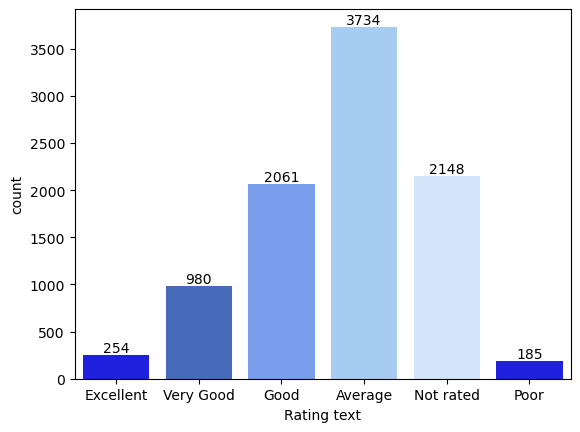

In [25]:
ax = sns.countplot(data=clean_data,x='Rating text',palette=['#0000FF', '#3366CC', '#6699FF', '#99CCFF', '#CCE5FF'])
ax.bar_label(ax.containers[0])
plt.show()

## `Observation:`

It can be observed that most popular rating is for 'Average'. But this does'nt give much insights for a particular contry.



## 5.4 Fuction definition:
### 1. Distribution of Aggregate Rating for a particular country 
### 2. % Distribution of Restaurants Based on rating for a particular country

`Note`: Here we have only compared India and USA

In [26]:
def get_ratingdist(clean_data,country):
    agg = None
    for i, j in clean_data.groupby('Country'):
        if i == country:
            agg = j['Aggregate rating']
    fig = plt.figure(figsize=(12,8))
    plt.title(f'DISTRIBUTION OF AGGREGATE RATING IN {country.upper()}')
    plt.xlabel('Aggregate rating')
    plt.ylabel('Count of Aggregate rating')
    plt.grid()
    sns.histplot(data=agg)

In [27]:
def get_restdist(clean_data,country):
    
    df = clean_data[clean_data['Country']==country]
    ratings = df['Rating text'].unique()
    ratings_count = np.zeros(len(ratings))
    for i in range(len(ratings)):
        ratings_count[i] = (df.groupby('Rating text').count().loc[ratings[i]][0])
    
    sort_indices = np.argsort(ratings_count)[::-1]
    ratings = ratings[sort_indices]
    ratings_count = ratings_count[sort_indices]
    
    total_rest = len(df)
    ratings_dist = (ratings_count/total_rest)*100
    ratings_dist = np.round(ratings_dist,decimals=2)
    fig = plt.figure(figsize=(12,8))
    plt.title(f'% DISTRIBUTION OF RESTAURANTS BASED ON RATINGS {country.upper()}')
    plt.xlabel('% Distribution of Resteraunts')
    plt.ylabel('Ratings')
    ax = sns.barplot(x=ratings,y=ratings_dist)
    ax.bar_label(ax.containers[0])
    plt.show()
    
    
    

### 5.4.1 USA Ratings

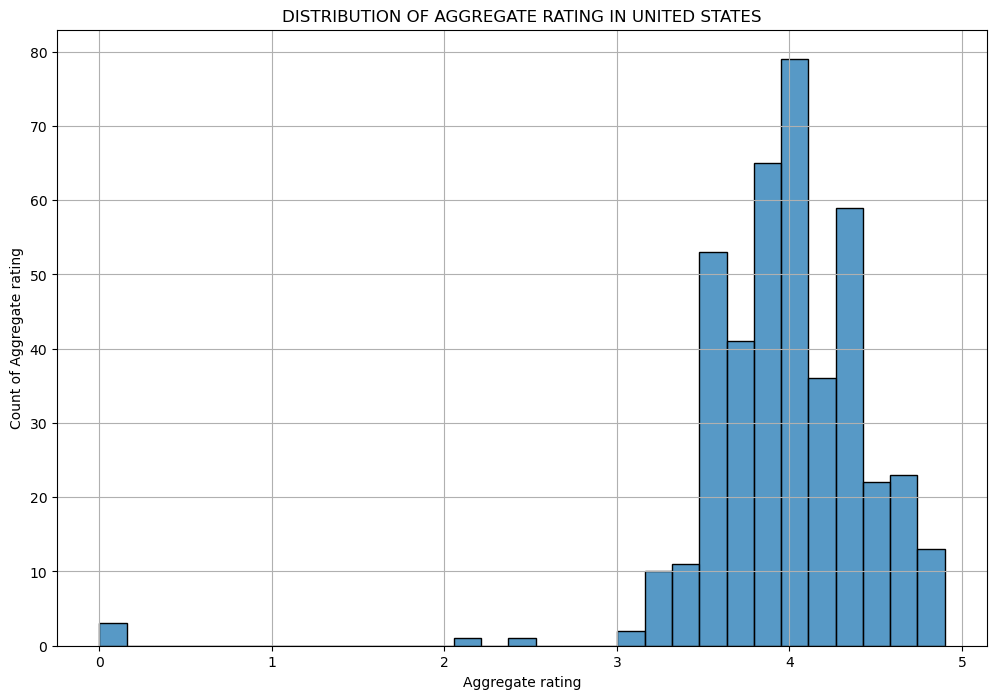

In [28]:
get_ratingdist(clean_data,'United States')

## `Observation:`
Here we can observe that in USA people usually rate if the food is between Average - Excellent. A few ratings are given for poor restaurants
This can mean two things:
  1. Either people in USA tend to avoid rating negatively 
  2. Or most of the restuarants in USA serve quite good food 
 
`Note`: This may also result of lack of datapoints for USA as well


### 5.4.2 % Distribution of Resteraunts based on ratings in USA

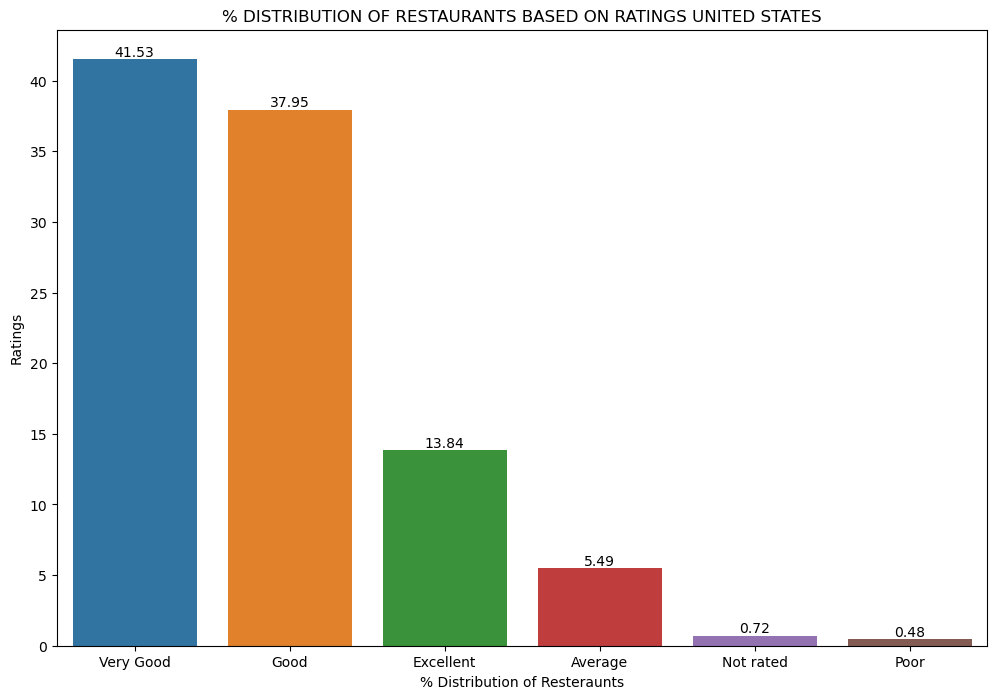

In [29]:
get_restdist(clean_data,'United States')

## `Observation:`
With this graph we can cleary notice that 40% of restaurants in USA are raitng 'Very Good'. A major percentage of distribution are rated 'Very Good','Good' or 'Excellent'. 


### 5.4.3 India Ratings

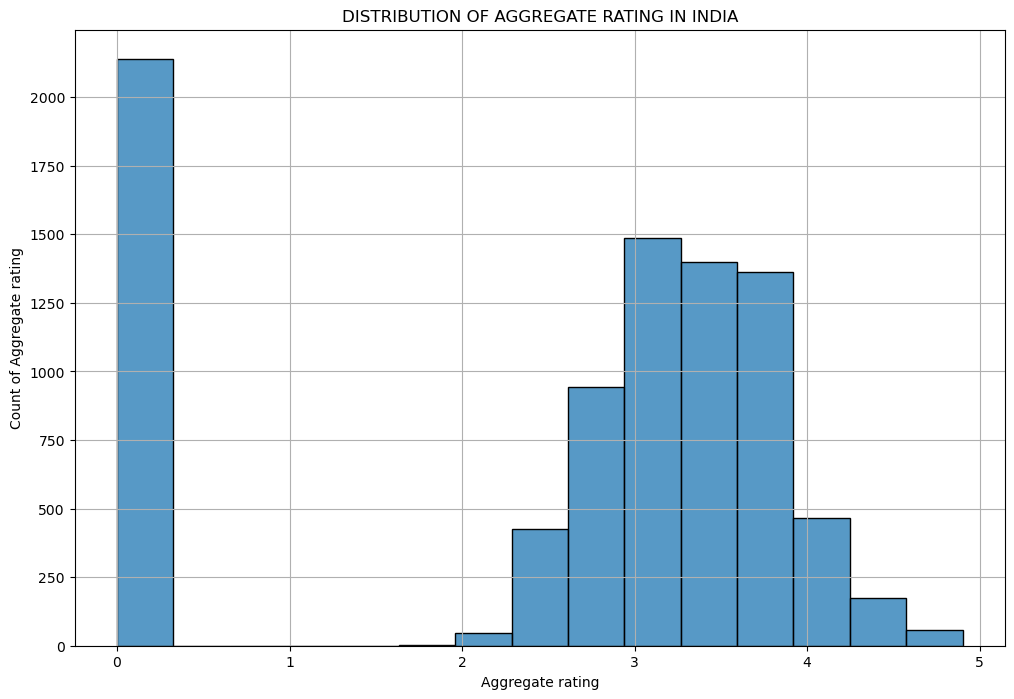

In [30]:
get_ratingdist(clean_data,'India')

## `Observation:`
Here we can observe that in India people usually rate if the food is between Average - Excellent. But here interestingly they penealize heavily for bad food/service. This is very different from the behaviour of customers in USA. This can be result of one of the following:

1. People are senstive towards quality of food/service
2. Major restaurants in India aren't able to provide good quality food.
3. In India, people tend to rate poor so as avail free exchanges or cashbacks

`Note`: The datapoints for India are huge as compared to USA 

### 5.4.4 % Distribution of Resteraunts based on ratings in India

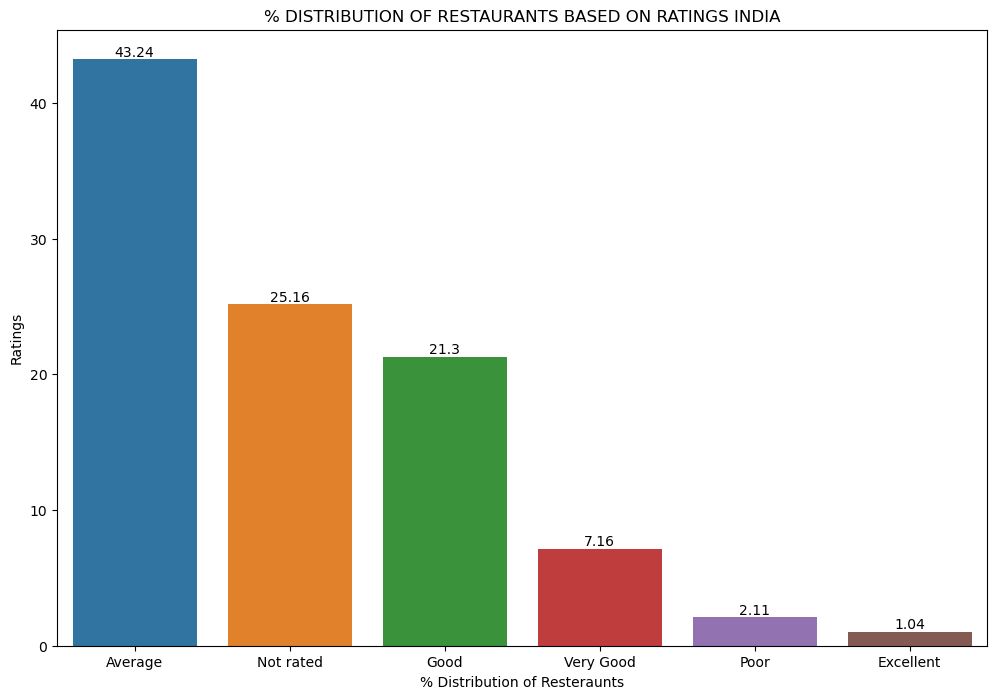

In [31]:
get_restdist(clean_data,'India')

## `Observation:`
Here we can observe that when it comes to rating, Indian consumer is not generous with rating as 25% of restaurants are not rated (although this might be because data is large compared to USA). But this might also because of the fact that major chunk of Indian Restuarants fail to provide good food

## 5.5 Distribution of Votes

In [32]:
def get_country_votes(clean_data,country):
    df = clean_data[clean_data['Country']==country]
    fig = plt.figure(figsize=(12,8))
    plt.title(f'DISTRIBUTION OF VOTES IN {country.upper()}')
    plt.xlabel('Votes')
    plt.ylabel('Count of Votes')
    plt.xticks(np.arange(0,1500,50),rotation=45)
    plt.grid()
    sns.histplot(data=df['Votes'],bins=20)
     

## 5.5.1 Distribution of Votes in USA

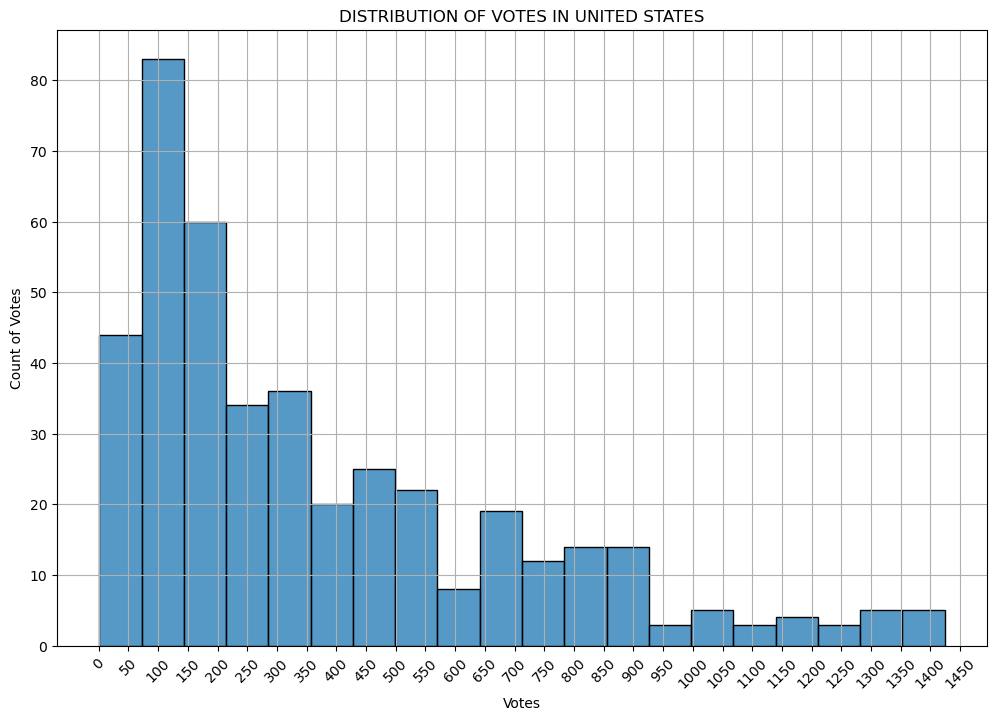

In [33]:
get_country_votes(clean_data,'United States')

## `Observation:`
Clearly, there is a good variation in number of votes in USA. People tend to give more feedbacks in USA

### 5.5.2 Distribution of Votes in India

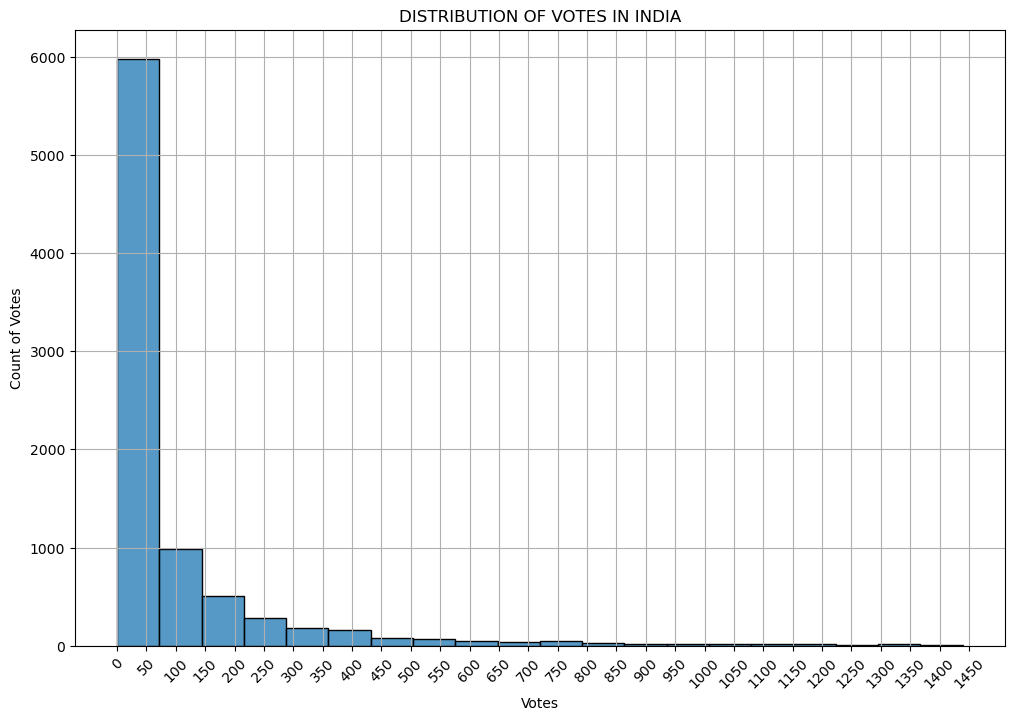

In [34]:
get_country_votes(clean_data,'India')

## `Observation:`
Clearly, there is a less variation in number of votes in India. People tend to give less feedbacks in India

## 5.6 Understanding Cuisines

In [35]:
def get_cuisines(clean_data,country):
    
    df = clean_data[clean_data['Country']==country]
    top_10 = df['Cuisines'].value_counts().nlargest(10)
    total = len(df)
    cuisine_type = np.array(top_10.keys())
    cuisine_count = np.array(top_10.values)
    
    cuisine_count = (cuisine_count/total)*100
    cuisine_count = np.round(cuisine_count,decimals=2)
 
    
    fig = plt.figure(figsize=(12,8))
    plt.title(f'%DISTRIBUTION OF TOP 10 CUISINES IN {country.upper()}')
    plt.xlabel('Cuisines')
    plt.ylabel('% Count')
    plt.xticks(rotation=90)
    ax = sns.barplot(x=cuisine_type,y=cuisine_count)
    #ax = sns.countplot(x='Cuisines',data=df,order=top_10.index)
    ax.bar_label(ax.containers[0])
    plt.show()



### 5.6.1 Top 10 Cuisines in India

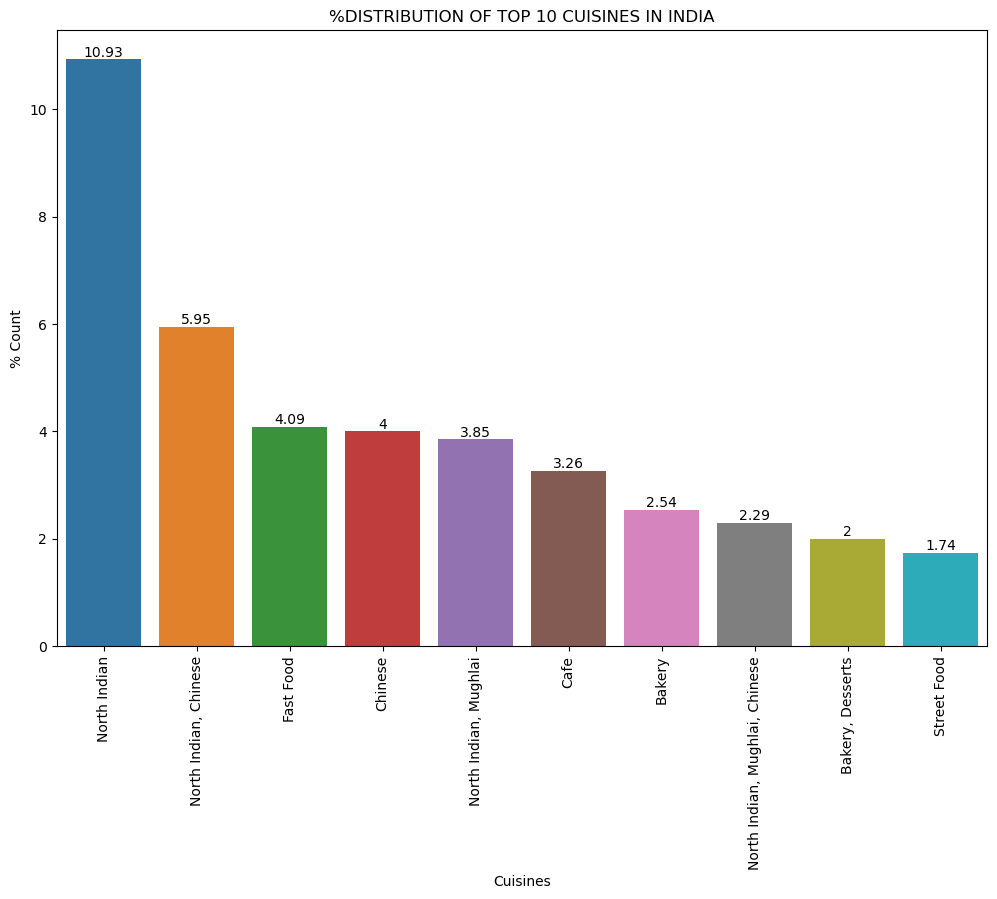

In [36]:
get_cuisines(clean_data,'India')

## `Observation:`
Clearly, North Indian food tend to dominate the market. But this might be because the data is concentrated more in North Indian States!! Lets verify

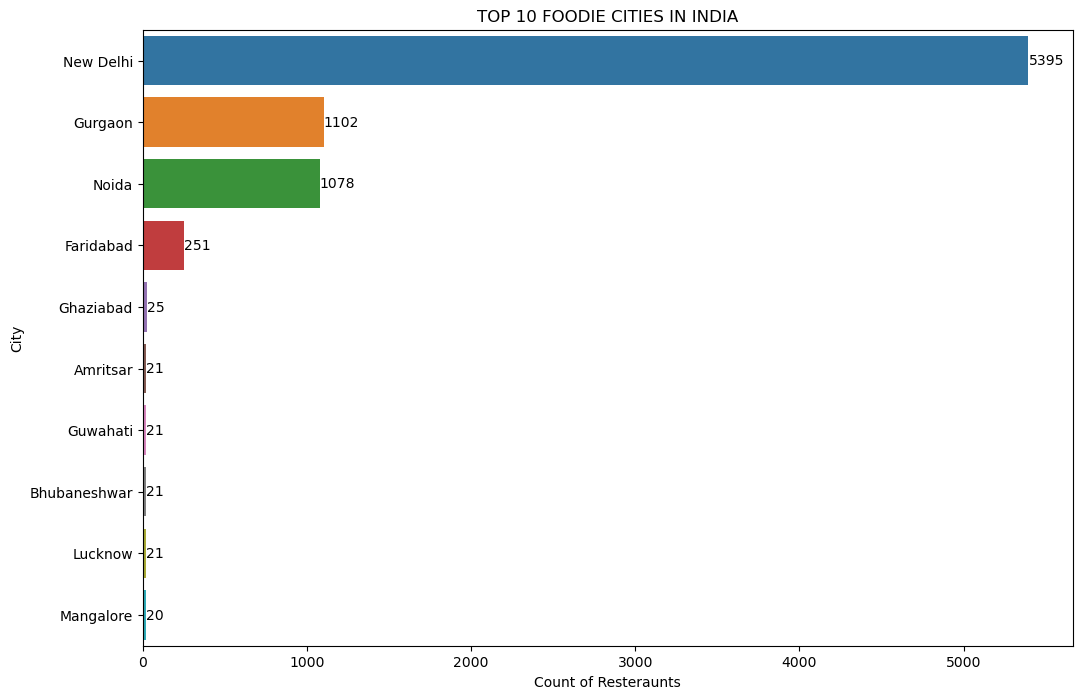

In [37]:
df = clean_data[clean_data['Country']=='India']
fig = plt.figure(figsize=(12,8))
plt.title('TOP 10 FOODIE CITIES IN INDIA')
plt.xlabel('Count of Resteraunts')
plt.ylabel('City')
top_10 = df['City'].value_counts().nlargest(10)
ax = sns.barplot(x=top_10.values,y=top_10.index) 
ax.bar_label(ax.containers[0])
plt.show()

## `Observation:`
We can see that most of restaurants are located in Delhi- NCR Region and thats why the popularity of North Indian food is validated

### 5.6.2 Top 10 Cuisines in USA

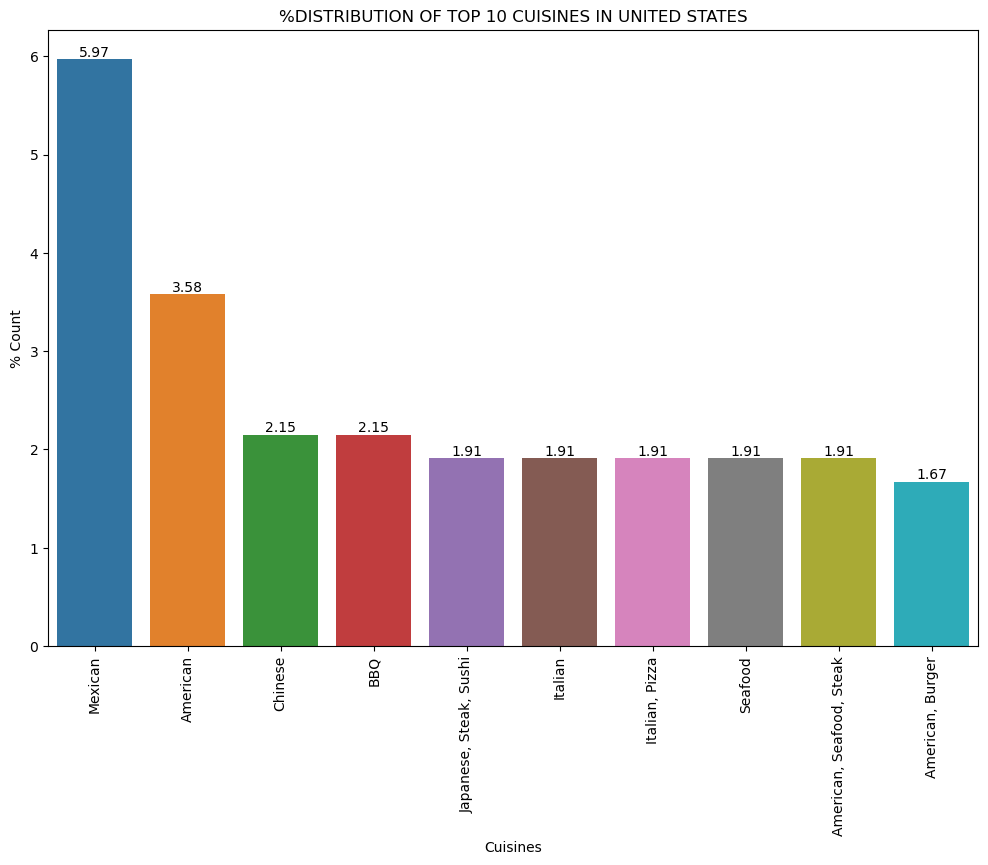

In [38]:
get_cuisines(clean_data,'United States')

## `Observation:`
We can see that Mexican cuisines is most popular among the folks in USA, but there is not much difference in popularity of other cuisines like American, Chinese etc

### 5.7 Which country has the cheaper food?



In [39]:
def convert_to_dollar(value, currency):
    # Dictionary of currency conversion rates with respect to Dollar
    conversion_rates = {
        'Botswana Pula(P)': 0.092,
        'Brazilian Real(R$)': 0.192,
        'Dollar($)': 1.0,
        'Emirati Diram(AED)': 0.272,
        'Indian Rupees(Rs.)': 0.014,
        'NewZealand($)': 0.706,
        'Pounds(\x8c£)': 1.38,
        'Qatari Rial(QR)': 0.27,
        'Rand(R)': 0.068,
        'Sri Lankan Rupee(LKR)': 0.0053,
        'Turkish Lira(TL)': 0.12
    }

    # Convert the value to Dollar
    if currency in conversion_rates:
        value_in_dollar = value * conversion_rates[currency]
        return value_in_dollar
    else:
        return None 

In [40]:
clean_data['Average Cost for two ($)'] = clean_data.apply(lambda x:convert_to_dollar(x['Average Cost for two'],x['Currency']),axis=1)

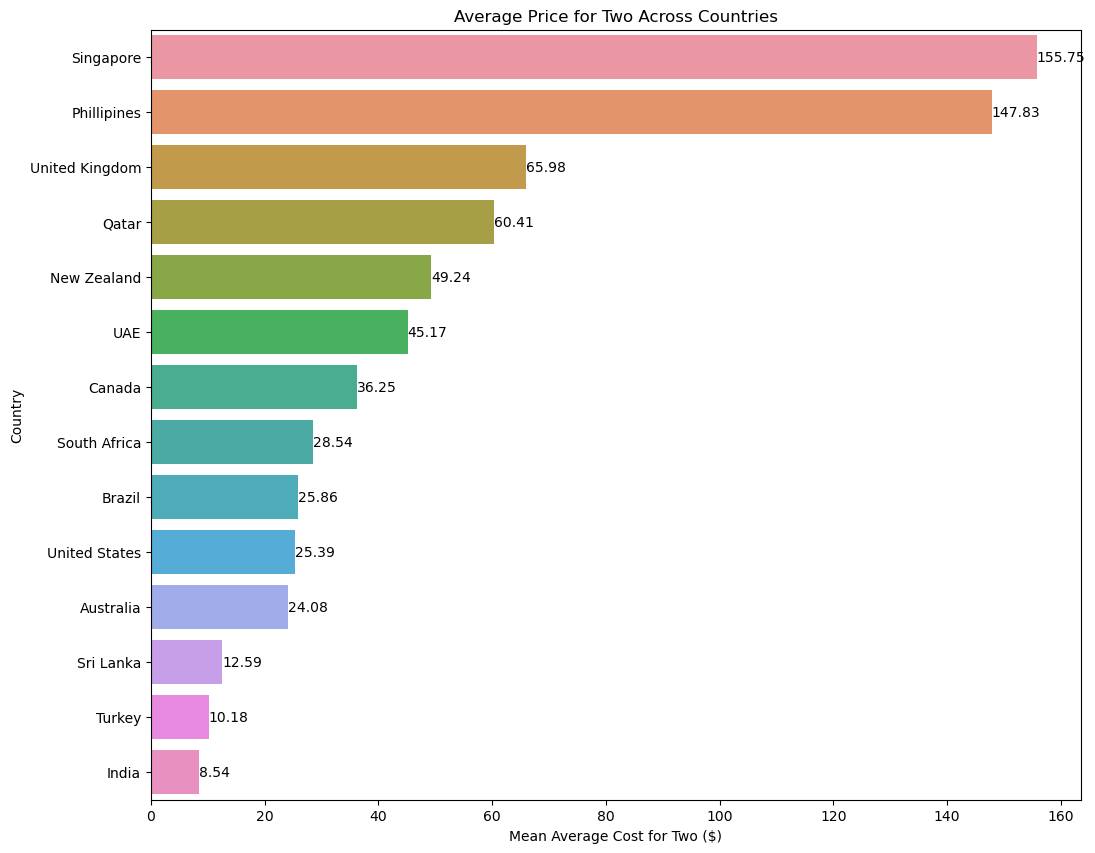

In [41]:
fig = plt.figure(figsize=(12,10))
plt.title('Average Price for Two Across Countries')
plt.xlabel('Mean Average Cost for Two ($)')
plt.ylabel('Country')
avg_cost = clean_data.groupby('Country').mean()['Average Cost for two ($)']
avg_cost = avg_cost.sort_values(ascending=False)
avg_cost = avg_cost.round(2)
ax = sns.barplot(x=avg_cost.values,y=avg_cost.index) 
ax.bar_label(ax.containers[0])
plt.show()

## `Observation:`
Here we can observe that if we consider "Average Cost for Two (Dollar)", then Singapore tends to serve most expensive food across all countries whereas India tends to serve cheapest of all.


### 5.7 Distibution of Avg Cost for Two across all Price range



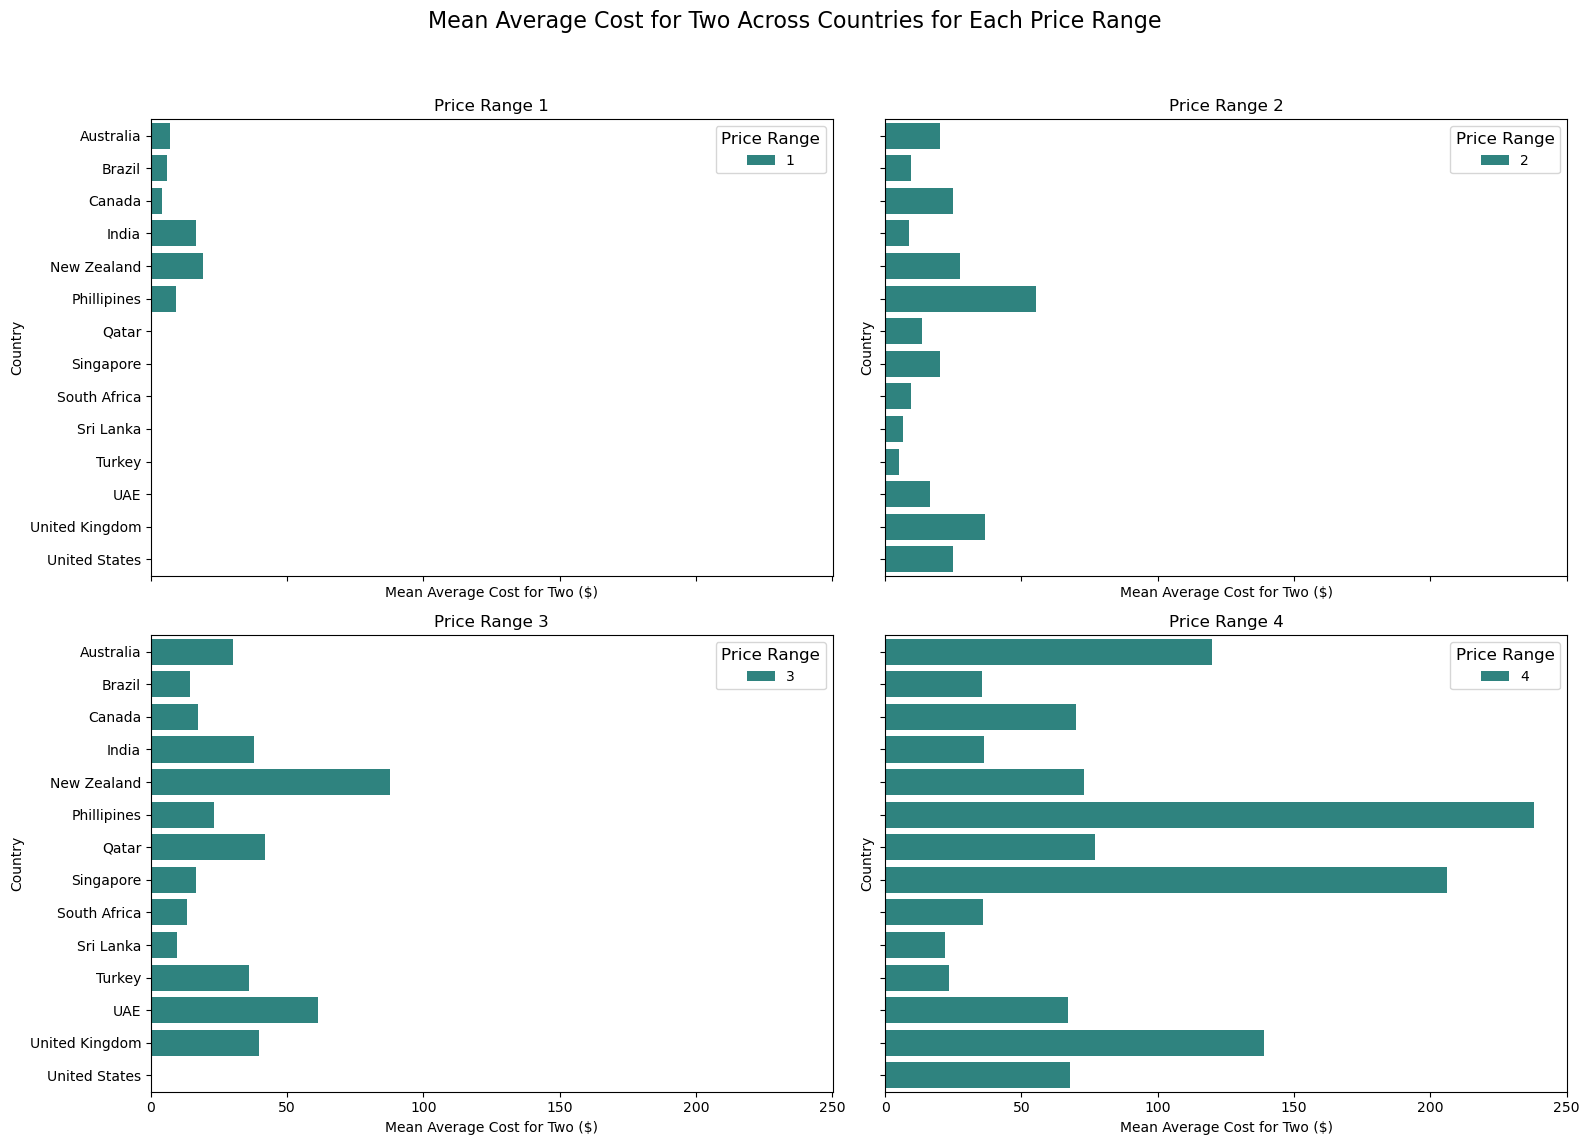

In [42]:
grouped_data = clean_data.groupby(['Country', 'Price range'])['Average Cost for two ($)'].mean().reset_index()

# Get the unique price range values
price_ranges = sorted(grouped_data['Price range'].unique())

# Create the subplots for each price range
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

# Flatten the axes for easier indexing
axs = axs.ravel()

# Create the partitioned bar plots for each price range value
for i, price_range in enumerate(price_ranges):
    filtered_data = grouped_data[grouped_data['Price range'] == price_range]
    sns.barplot(x='Average Cost for two ($)', y='Country', data=filtered_data, hue='Price range', palette='viridis', ax=axs[i])
    axs[i].set_title(f'Price Range {price_range}')
    axs[i].legend(title='Price Range', title_fontsize='large')
    axs[i].set_xlabel('Mean Average Cost for Two ($)')
    axs[i].set_ylabel('Country')

plt.suptitle('Mean Average Cost for Two Across Countries for Each Price Range', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## `Observation:`

40% of restaurants across geographies fall into the cheaper price range of 1, with 32%, 14%, 6% of restaurants falling into 2,3,4 respectively, this is because Indian price range 1 restaurants are dominating the dataset. Similar distribution can be found for Indian restaurants as well.


Overall Philippines, the UK, and Singapore have higher food prices(Price range 4) and Indonesia, Turkey and Sri Lanka (price range 2) have lower prices.

### 5.8 Top 10 Expensive Restaurants in India



In [43]:
def get_expensive(clean_data,country):
    top_10 = clean_data[clean_data['Country']==country].groupby('Restaurant Name').max()['Average Cost for two ($)'].nlargest(10)
    names = top_10.index
    cost = top_10.values
    fig = plt.figure(figsize=(12,10))
    plt.title(f'TOP 10 EXPENSIVE RESTERAUNTS IN {country} ')
    plt.xlabel('Mean Average Cost for Two ($)')
    plt.ylabel('Restaurant Name')
    ax = sns.barplot(x=cost,y=names) 
    ax.bar_label(ax.containers[0])
    plt.show()

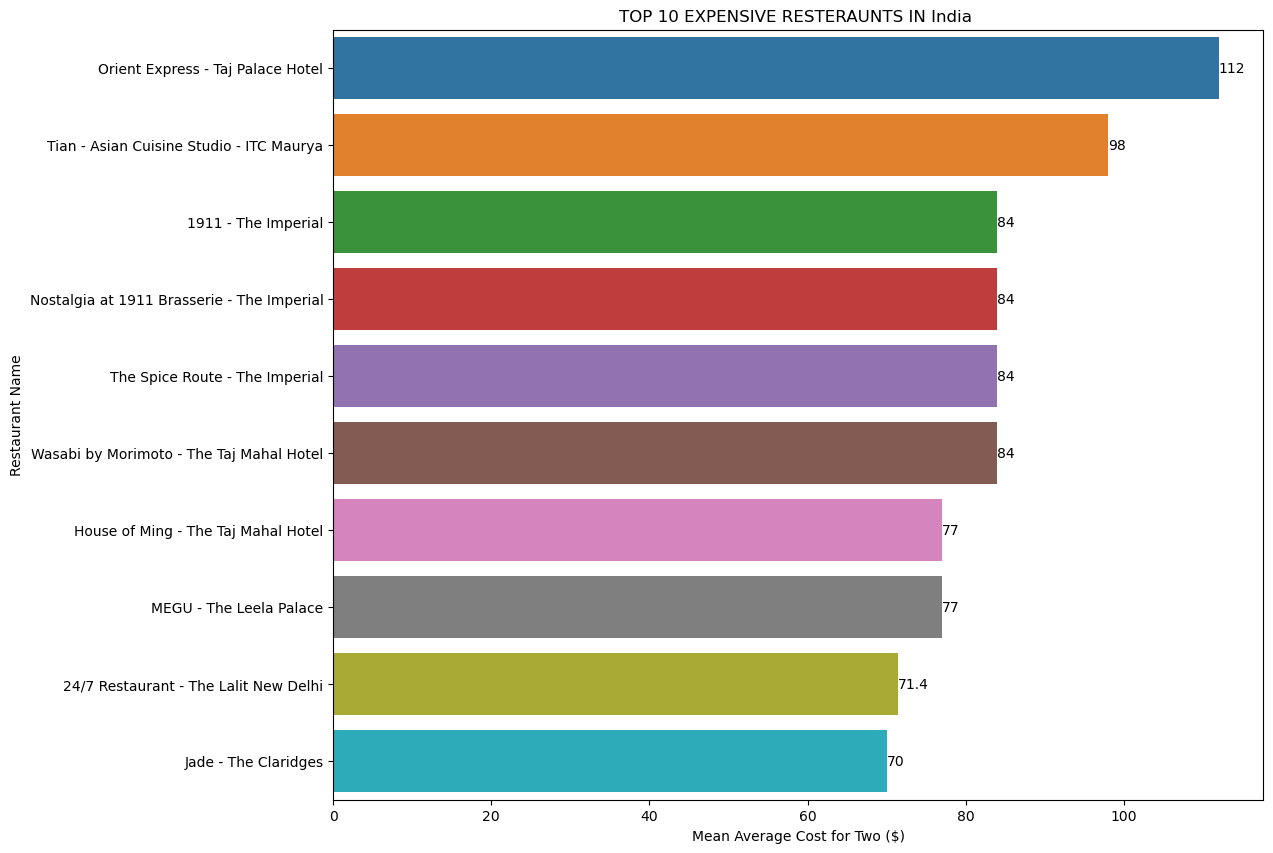

In [44]:
get_expensive(clean_data,'India')

### 5.9 Distribution of Price Ranges



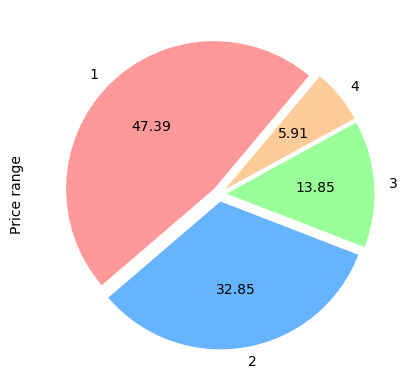

In [45]:
clean_data['Price range'].value_counts().plot(kind='pie', autopct = '%.2f',
                                              radius=1,startangle=50,counterclock=True,
                                              explode=[0.05,0.05,0.05,0.05],colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.show()


## `Observation:`

Here we can see that 47% of the data falls under price range 1 and 32% of it falls under price range 2. This might be because dataset is dominating with Indian Restaurants

## 6.0 Relationship Between Avg Cost for Two and Aggregate Rating

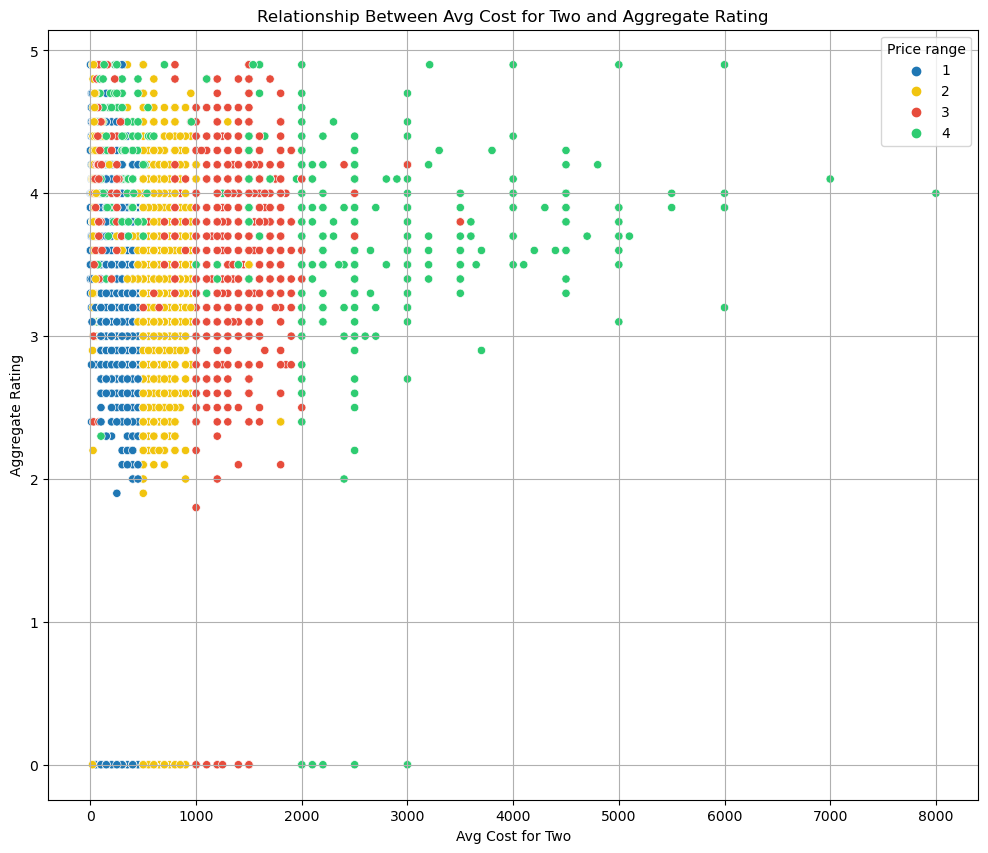

In [46]:
fig = plt.figure(figsize=(12,10))
sns.scatterplot(x='Average Cost for two',y='Aggregate rating',data=clean_data,hue='Price range',palette  = ['#1f77b4','#f1c40f','#e74c3c','#2ecc71'],marker='o', facecolors='none')
plt.title(f'Relationship Between Avg Cost for Two and Aggregate Rating')
plt.xlabel('Avg Cost for Two')
plt.ylabel('Aggregate Rating')  
plt.grid()
plt.show()

## `Observation:`

We can observe that expensive restaurants are rated highly whereas cheap restuarants are not rated that much

## Summary

1. 90% of observations belong to India.

2. USA(4) has higher ratings than India(3.5) and a majority of Indian restaurants have 0 ratings. Either Zomato should nudge customers to rate or these are newly onboarded restaurants.

3. US customers provide ratings more frequently and consistently than Indians.

4. Popular Indian cuisine is North Indian owing to major North Indian cities and for the USA it’s all Americana food.

5. India and US have moderate food prices as compared to the rest of the countries.

6. Positive relation exists between ratings and the average cost for two, this could be because of the assumed notion that premium restaurants have good ambiance or better service, whereas regular restaurants cannot provide such an experience which could lead to lower ratings.

